# Fausto Coppi Road Bike Race Analysis

In [1]:
import pandas as pd
import numpy as np
import gpxpy

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
%matplotlib inline


In [10]:
cycling = pd.read_csv('/data/coppi.csv',header=2)

In [11]:
cycling.head()

,Sample rate,Time,HR (bpm),Speed (km/h),Pace (min/km),Cadence,Altitude (m),Stride length (m),Distances (m),Temperatures (C),Power (W),Unnamed: 11
0,1.0,00:00:00,NaN,0.0,00:00,NaN,545,NaN,0.0,NaN,NaN,NaN
1,NaN,00:00:01,93.0,0.0,00:00,NaN,545,NaN,0.0,NaN,NaN,NaN
2,NaN,00:00:02,89.0,0.0,00:00,NaN,545,NaN,0.0,NaN,NaN,NaN
3,NaN,00:00:03,89.0,0.0,00:00,NaN,545,NaN,0.0,NaN,NaN,NaN
4,NaN,00:00:04,87.0,0.0,00:00,NaN,545,NaN,0.0,NaN,NaN,NaN


In [44]:
cycling.describe().loc[['mean','std','max']]

,Sample rate,HR (bpm),Speed (km/h),Cadence,Altitude (m),Stride length (m),Distances (m),Temperatures (C),Power (W),Unnamed: 11
mean,1.0,149.048717,20.811043,NaN,1074.762327,NaN,89065.645270,NaN,NaN,NaN
std,NaN,18.853218,13.797937,NaN,512.534095,NaN,43527.185333,NaN,NaN,NaN
max,1.0,212.000000,57.700000,NaN,2407.000000,NaN,172222.000000,NaN,NaN,NaN


In [12]:
cycling.columns

Index(['Sample rate', 'Time', 'HR (bpm)', 'Speed (km/h)', 'Pace (min/km)',
       'Cadence', 'Altitude (m)', 'Stride length (m)', 'Distances (m)',
       'Temperatures (C)', 'Power (W)', 'Unnamed: 11'],
      dtype='object')

In [50]:
speed = cycling['Speed (km/h)']
hr = cycling['HR (bpm)']
rolling_ave_speed = np.convolve(speed, np.ones((30,))/30, mode='valid')
rolling_ave_hr = np.convolve(hr, np.ones((10,))/10, mode='valid')

Text(0.5, 1.0, 'Speed vs Heart Beats')

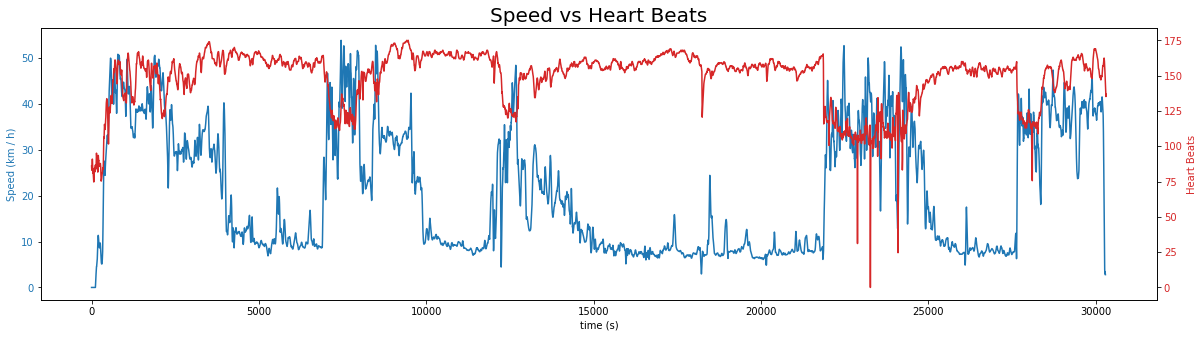

In [53]:
fig, ax1 = plt.subplots(figsize = (20,5))

color = 'tab:blue'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Speed (km / h)', color=color)
ax1.plot(rolling_ave_speed, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:red'
ax2.set_ylabel('Heart Beats', color=color)
ax2.plot(rolling_ave_hr, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Speed vs Heart Beats' , fontsize = 20)

### Extract segments from gpx file

In [29]:
gpx_file = open('/data/coppi.gpx', 'r')
gpx = gpxpy.parse(gpx_file)
lat = []
lon = []

for track in gpx.tracks:
    for segment in track.segments:
        for point in segment.points:
            lat.append(point.latitude)
            lon.append(point.longitude)

In [37]:
n = gpx.length_2d()
print(f'total length of the race: {n//1000} km')

total length of the race: 173.0 km


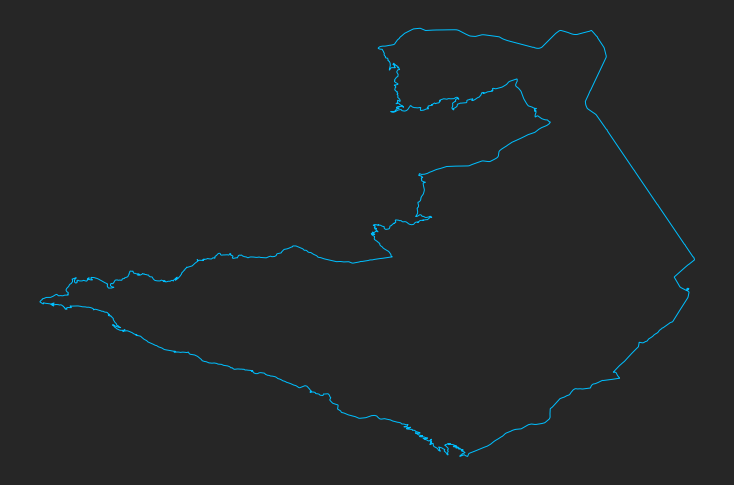

In [60]:
fig = plt.figure(facecolor = '0.15' , figsize = (10,10))
ax = plt.Axes(fig, [0., 0., 1., 1.], )
ax.set_aspect('equal')
ax.set_axis_off()
fig.add_axes(ax)
plt.plot(lon, lat, color = 'deepskyblue', lw = 1, alpha = 1)

# Speed over Map

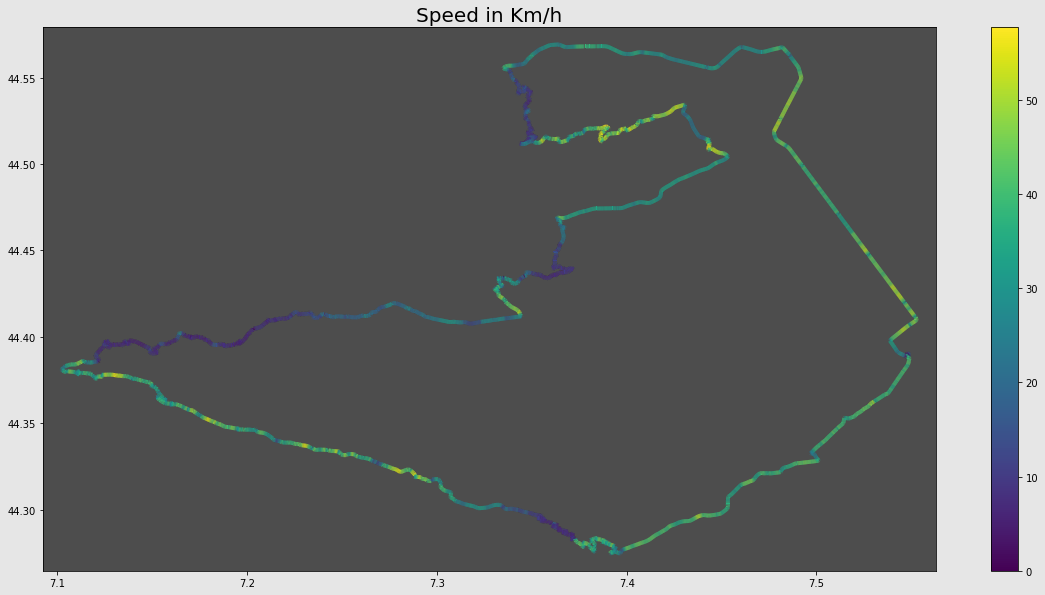

In [67]:
x = np.array(lon)
y = np.array(lat)
dydx = np.array(speed)  # first derivative

# Create a set of line segments so that we can color them individually
# This creates the points as a N x 1 x 2 array so that we can stack points
# together easily to get the segments. The segments array for line collection
# needs to be (numlines) x (points per line) x 2 (for x and y)
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)


fig = plt.figure(figsize=(20,10),facecolor = '0.9')
axs = plt.axes(facecolor = '0.3')
# Create a continuous norm to map from data points to colors
norm = plt.Normalize(dydx.min(), dydx.max())
lc = LineCollection(segments, cmap='viridis', norm=norm)

lc.set_array(dydx)
lc.set_linewidth(4)
lc.set_alpha(1)
line = axs.add_collection(lc)
fig.colorbar(line, ax=axs)

axs.set_xlim(x.min()-0.01, x.max()+0.01)
axs.set_ylim(y.min()-0.01, y.max()+0.01)
plt.title('Speed in Km/h' , fontsize = 20)

plt.show()

# Elevation

In [62]:
elevation = []
for track in gpx.tracks:
    for segment in track.segments:
        for point in segment.points:
            elevation.append(point.elevation)


### 3d projection

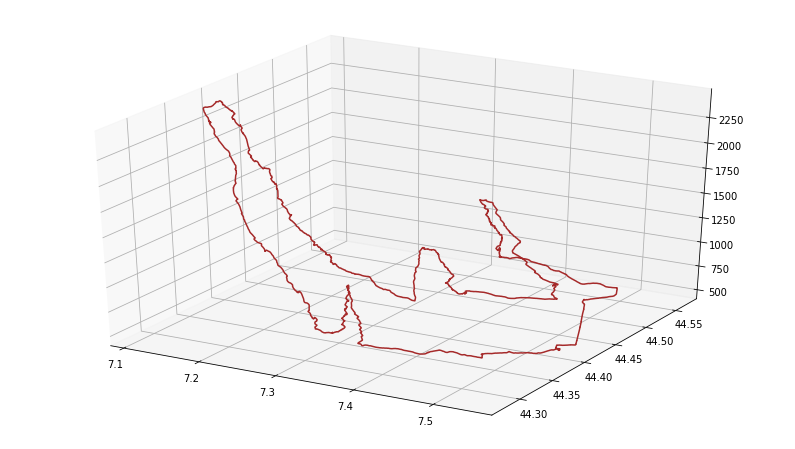

In [73]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (14,8))
ax = fig.add_subplot(111, projection='3d')

from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

x = np.array(lon)
y = np.array(lat)
z = np.array(elevation)
dydx = np.array(speed)  # first derivative
ax.plot(x,y,z , color = 'brown')

ax.set_xlim(x.min()-0.01, x.max()+0.01)
ax.set_ylim(y.min()-0.01, y.max()+0.01)


plt.show()

### To Do : color elevation segments according to heart beat data